<a href="https://colab.research.google.com/github/duchuy3007/CS114.L22.KHCL./blob/main/Update_X%E1%BB%AD_l%C3%AD_%E1%BA%A3nh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đọc ảnh, cắt ảnh và dùng HOG rút trích đặc trưng**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjhMjvik64Q1hdB8qFFNTez1I0GTicqnpWYhUq0SU_NBz2B4Fl0FuU
Mounted at /content/drive


In [ ]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 3.0, -100)
    bbox = diff.getbbox()
    return im.crop(bbox)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from skimage.feature import hog

(16, 16)
256
(256,)


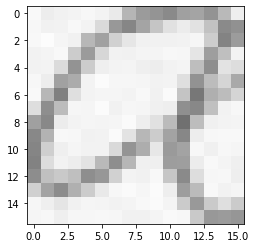

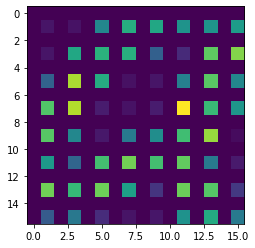

In [ ]:
# Show thử một ảnh sau khi loại bỏ khoảng trắng xung quanh chữ và dùng HOG
im = Image.open("/content/drive/MyDrive/Dataset/Dataset/1/1.jpg").convert('LA')
plt.imshow(im, cmap= 'gray')
print(im.size)
im = trim(im)
im = im.resize((16, 16))
img,im = hog(im, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
plt.figure()

plt.imshow(im)
print(im.size)
print(np.asarray(im).flatten().shape)

In [ ]:
FJoin = os.path.join
def getLink(path):
    ans = []
    label = []
    index = 0
    list_folder = [FJoin(path, f) for f in sorted(os.listdir(path))]
    for f in list_folder:
        list_img = [FJoin(f, img_id) for img_id in sorted(os.listdir(f))]
        for img_link in list_img:
            ans.append(img_link)
            label.append(index)
        index += 1
    return ans, label

In [ ]:

train_path = '/content/drive/MyDrive/Dataset/Update 26 7/TrainData'
test_path = '/content/drive/MyDrive/Dataset/Update 26 7/TestData'
link_train, label_train = getLink(train_path)
link_test, label_test = getLink(test_path)
print(len(link_train))
print(len(link_test))

24626
10555


In [ ]:
def getFeature_Label(link, label):
    list_feature = []
    for img_link in link:
        img = Image.open(img_link).convert('LA')
        img = trim(img)
        img = img.resize((16, 16))
        img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False)
        list_feature.append(np.asarray(img).ravel())
        print(np.asarray(img).ravel().shape)
    return np.array(list_feature), np.array(label)

**Lấy feature và lưu lại dưới dạng file .csv**

In [ ]:
X_train, Y_train = getFeature_Label(link_train, label_train)

In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/BackUpData/TrimImage/X_train_16x16_hog.csv', header= None, index=None)
pd.DataFrame(Y_train).to_csv('/content/drive/MyDrive/BackUpData/TrimImage/Y_train_16x16_hog.csv', header= None, index=None)

In [ ]:
X_test, Y_test = getFeature_Label(link_test, label_test)
print(X_test.shape)
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_test_16x16_hog.csv', header= None, index=None)
pd.DataFrame(Y_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_test_16x16_hog.csv', header= None, index=None)

(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)
(1764,)


In [ ]:
print(X_test.shape)

(5321, 1764)
(5275, 1764)


In [ ]:
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_test_16x16_hog.csv', header= None, index=None)

In [ ]:

pd.DataFrame(Y_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_test_16x16_hog.csv', header= None, index=None)